# Derivation of the potential using simpy

In [ ]:
%matplotlib widget

In [ ]:
# Código en SymPy para calcular el curl (rotacional) de los dos ejemplos proporcionados
import sympy as sp

# Definición de símbolos
X1, X2 = sp.symbols('X1 X2')
x, y = sp.symbols('x y')
a, c, I1, I2, I3 = sp.symbols('a c I1 I2 I3')

# Primer ejemplo (original del usuario)
phi_p, phi_pp, s0, IL, IC, IR, sL, sC, sR = sp.symbols('phi_p phi_pp s0 IL IC IR sL sC sR')

F1_ejemplo1 = (phi_p / 2)*(IL - IC + sL - sC) + s0**2 * phi_pp * X1 * X2
F2_ejemplo1 = (phi_p / 6)*(IL + IC - 2*IR + sL + sC - 2*sR) + (s0**2 * phi_pp / 6)*(X1**2 - 3*X2**2)

curl_ejemplo1 = sp.simplify(sp.diff(F2_ejemplo1, X1)*6 - sp.diff(F1_ejemplo1, X2)*2)
print(sp.latex( sp.simplify(sp.diff(F1_ejemplo1*2, X2))))
print(sp.latex( sp.simplify(sp.diff(F2_ejemplo1*6, X1))))
# Segundo ejemplo (de la imagen subida por el usuario, modelo poblacional con potencial explícito)
F1_ejemplo2 = a*(I1 - I2)/2 + x*y - c*(x**2 + 3*y**2)*x
F2_ejemplo2 = a*(I1 + I2 - 2*I3)/6 + (x**2 - 3*y**2)/6 - c*(x**2 + 3*y**2)*y

curl_ejemplo2 = sp.simplify(sp.diff(F2_ejemplo2, x)/2 - sp.diff(F1_ejemplo2, y)/6)

# Mostrar resultados del curl para ambos ejemplos
curl_ejemplo1, curl_ejemplo2


In [ ]:
# Definir la función potencial dada en SymPy y calcular sus derivadas parciales
x, y = sp.symbols('x y')
a, c, I1, I2, I3 = sp.symbols('a c I1 I2 I3')

# Definir la función potencial ψ(x,y)
psi = -a*(I1 - I2)*x - a*(I1 + I2 - 2*I3)*y - (y*x**2 - y**3) + c*(x**4/2 + (9/2)*y**4 + 3*x**2*y**2)

# Calcular derivadas parciales
dpsi_dx = sp.diff(psi, x)
dpsi_dy = sp.diff(psi, y)

# Simplificar las derivadas
dpsi_dx_simplified = sp.simplify(dpsi_dx)
dpsi_dy_simplified = sp.simplify(dpsi_dy)
-dpsi_dx_simplified
print()
-dpsi_dy_simplified/6 

In [ ]:
F2_ejemplo2

In [ ]:
# Ahora calculamos explícitamente el potencial usando SymPy, dado que has reescrito el campo con factores adecuados.
import sympy as sp

# Definimos variables simbólicas
X1, X2 = sp.symbols('X1 X2')
phi_p, phi_pp, s0, IL, IC, IR, sL, sC, sR, R = sp.symbols('phi_p phi_pp s0 IL IC IR sL sC sR, R')

# Campo ajustado como lo planteas en la corrección
F1_bar = (phi_p / 2)*(IL - IC + R*(sL - sC)) + s0**2 * phi_pp * X1 * X2
F2_bar = (phi_p / 6)*(IL + IC - 2*IR + R*(sL + sC - 2*sR)) + (s0**2 * phi_pp / 6)*(X1**2 - 3*X2**2)

# Definir ahora el campo ajustado multiplicando la segunda componente por 3, como lo mencionas explícitamente
F1 = -F1_bar
F2 = -3 * F2_bar

# Verificar nuevamente el curl para asegurar que el campo es irrotacional
curl = sp.simplify(sp.diff(F2, X1) - sp.diff(F1, X2))

# Calcular el potencial integrando respecto a X1 y luego respecto a X2
potencial = sp.integrate(F1, X1)  # Integramos respecto a X1
# Añadimos términos que dependen solo de X2 que no hayan sido considerados aún
potencial += sp.integrate(F2 - sp.diff(potencial, X2), X2)

# Simplificamos el resultado
potencial_simplificado = sp.simplify(potencial)

potencial_simplificado
# print(sp.latex(potencial_simplificado))

In [ ]:
dpsi_dx = sp.diff(potencial_simplificado, X1)
dpsi_dy = sp.diff(potencial_simplificado, X2)

# Simplificar las derivadas
dpsi_dx_simplified = sp.simplify(dpsi_dx)
dpsi_dy_simplified = sp.simplify(dpsi_dy)
dpsi_dy_simplified

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir valores arbitrarios para los parámetros
phi_p_val = 1
phi_pp_val = 2
s0_val = 1
IL_val, IC_val, IR_val = 100, 100, 100
sL_val, sC_val, sR_val = 1, 1, 1
R_val = 1
IL_val, IC_val, IR_val = 0.5, 0.5, 0.5
sL_val, sC_val, sR_val = 1, 1, 1
R_val = 1/4

# Convertir el potencial simbólico a función numérica
potencial_num = sp.lambdify((X1, X2), potencial_simplificado.subs({
    phi_p: phi_p_val,
    phi_pp: phi_pp_val,
    s0: s0_val,
    IL: IL_val,
    IC: IC_val,
    IR: IR_val,
    sL: sL_val,
    sC: sC_val,
    sR: sR_val,
    R: R_val
}))
# Add caption with the chosen values

# Crear malla de valores
x_vals = np.linspace(-10, 10, 200)
y_vals = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = potencial_num(X, Y)
Z = np.clip(Z, -50, 100)  # Limitar el rango de Z para evitar problemas de visualización

# Gráfica 3D del potencial
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
caption = f"Chosen values: $\phi'={phi_p_val}, \phi''={phi_pp_val}, s_0={s0_val}, I_L={IL_val}, I_C={IC_val}, I_R={IR_val}, s_L={sL_val}, s_C={sC_val}, s_R={sR_val}, R = {R_val}$"
ax.text2D(0.05, -0.05, caption, transform=ax.transAxes, fontsize=10, verticalalignment='top')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$\psi(X_1,X_2)$')
ax.set_title('Potential $\psi(X_1,X_2)$')
plt.savefig('potencial.png', dpi = 600)
plt.show()



In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Create a grid of values for X1 and X2
x_vals = np.linspace(-2, 2, 200)
y_vals = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x_vals, y_vals)

# Use the existing potential_num function from cell 12
Z = potencial_num(X, Y)

# Create a contour plot with filled contours
fig, ax = plt.subplots(figsize=(10, 8))

# Create a filled contour plot with 30 levels
contour = ax.contourf(X, Y, Z, 30, cmap='viridis')
# Add contour lines for better visualization
ax.contour(X, Y, Z, 15, colors='white', linewidths=0.5, alpha=0.7)

# Mark the critical points
critical_points = [(-1, 0), (0, 0), (1, 0)]
ax.scatter(*zip(*critical_points), color='red', s=100, marker='o', label='Critical Points')

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Potential Value $\\psi(X_1, X_2)$')

# Add labels and title
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_title('Potential Landscape $\\psi(X_1, X_2)$')
ax.legend()

# Show grid
ax.grid(linestyle='--', alpha=0.3)

# Set equal aspect ratio
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('potential_landscape.png', dpi=300)
plt.show()

# Order $O(\varepsilon^3)$

In [1]:
import sympy as sp

# Definimos las variables simbólicas
X1, X2 = sp.symbols('X1 X2')
tau, phi_p, phi_pp, phi_ppp, s0, c,g, phi_Ip = sp.symbols('tau phi_p phi_pp phi_ppp s0 c g phi_Ip')
I_L, I_C, I_R, s_L, s_C, s_R, R = sp.symbols('I_L I_C I_R s_L s_C s_R R')

# Definimos los componentes del campo vectorial (parte determinista, sin ruido)
F1 = -(
    (phi_p/2)*(I_L - I_C + X1*(s_L+s_C) + (R+X2)*(s_L-s_C)) +
    (s0*phi_pp/2)*(
         R*(s_L+s_C) + I_L + I_C + (2*(s0-c*g*phi_Ip))/(3*c*g*phi_Ip)*(I_L+I_C+I_R + R*(s_L+s_C+s_R))
    )*X1 +
    (s0*phi_pp/2)*(R*(s_L-s_C) + I_L - I_C)*X2 +
    s0**2 * phi_pp * X1*X2 +
    ((s0-c*g*phi_Ip)/(3*c*g*phi_Ip))* s0**3 * (phi_pp**2) * X1*(X1**2+3*X2**2) +
    (phi_ppp*s0**3/6)* X1*(X1**2+3*X2**2)
)

F2 = -3*(
    (phi_p/6)*(X1*(s_L-s_C) + X2*(s_L+s_C+4*s_R) + I_L + I_C - 2*I_R + R*(s_L+s_C-2*s_R)) +
    (s0*phi_pp/6)*(
         R*(s_L+s_C+4*s_R) + (I_L+I_C+4*I_R) + ((s0-c*g*phi_Ip)/(2*c*g*phi_Ip))*(I_L+I_C+I_R + R*(s_L+s_C+s_R))
    )*X2 +
    (s0*phi_pp/6)*(R*(s_L-s_C) + I_L - I_C)*X1 +
    (s0**2 * phi_pp/6)*(X1**2-3*X2**2) +
    ((s0-c*g*phi_Ip)/(3*c*g*phi_Ip))* s0**3 * (phi_pp**2) * X2*(X1**2+3*X2**2) +
    (phi_ppp*s0**3/6)* X2*(X1**2+3*X2**2)
)


curl = sp.simplify(sp.diff(F2, X1) - sp.diff(F1, X2))
print("Curl del campo:", curl)

U = sp.integrate(F1, X1)
U += sp.integrate(F2 - sp.diff(U, X2), X2)

# Simplificamos el potencial obtenido
U_simpl = sp.simplify(U)

# Mostramos el potencial (forma simbólica y en LaTeX)
print("Potencial U:")
print("\nForma LaTeX:")
print(sp.latex(U_simpl))
U_simpl

Curl del campo: 0
Potencial U:

Forma LaTeX:
\frac{X_{1}^{4} s_{0}^{3} \left(2 c g \phi_{Ip} \phi_{pp}^{2} - c g \phi_{Ip} \phi_{ppp} - 2 \phi_{pp}^{2} s_{0}\right) + 2 X_{1}^{2} \left(- I_{C} c g \phi_{Ip} \phi_{pp} s_{0} - 2 I_{C} \phi_{pp} s_{0}^{2} - I_{L} c g \phi_{Ip} \phi_{pp} s_{0} - 2 I_{L} \phi_{pp} s_{0}^{2} + 2 I_{R} c g \phi_{Ip} \phi_{pp} s_{0} - 2 I_{R} \phi_{pp} s_{0}^{2} - R c g \phi_{Ip} \phi_{pp} s_{0} s_{C} - R c g \phi_{Ip} \phi_{pp} s_{0} s_{L} + 2 R c g \phi_{Ip} \phi_{pp} s_{0} s_{R} - 2 R \phi_{pp} s_{0}^{2} s_{C} - 2 R \phi_{pp} s_{0}^{2} s_{L} - 2 R \phi_{pp} s_{0}^{2} s_{R} + 6 X_{2}^{2} c g \phi_{Ip} \phi_{pp}^{2} s_{0}^{3} - 3 X_{2}^{2} c g \phi_{Ip} \phi_{ppp} s_{0}^{3} - 6 X_{2}^{2} \phi_{pp}^{2} s_{0}^{4} - 6 X_{2} c g \phi_{Ip} \phi_{pp} s_{0}^{2} - 3 c g \phi_{Ip} \phi_{p} s_{C} - 3 c g \phi_{Ip} \phi_{p} s_{L}\right) + 9 X_{2}^{4} s_{0}^{3} \left(2 c g \phi_{Ip} \phi_{pp}^{2} - c g \phi_{Ip} \phi_{ppp} - 2 \phi_{pp}^{2} s_{0}\right) - 3 X_{2}^{2} \le

(X1**4*s0**3*(2*c*g*phi_Ip*phi_pp**2 - c*g*phi_Ip*phi_ppp - 2*phi_pp**2*s0) + 2*X1**2*(-I_C*c*g*phi_Ip*phi_pp*s0 - 2*I_C*phi_pp*s0**2 - I_L*c*g*phi_Ip*phi_pp*s0 - 2*I_L*phi_pp*s0**2 + 2*I_R*c*g*phi_Ip*phi_pp*s0 - 2*I_R*phi_pp*s0**2 - R*c*g*phi_Ip*phi_pp*s0*s_C - R*c*g*phi_Ip*phi_pp*s0*s_L + 2*R*c*g*phi_Ip*phi_pp*s0*s_R - 2*R*phi_pp*s0**2*s_C - 2*R*phi_pp*s0**2*s_L - 2*R*phi_pp*s0**2*s_R + 6*X2**2*c*g*phi_Ip*phi_pp**2*s0**3 - 3*X2**2*c*g*phi_Ip*phi_ppp*s0**3 - 6*X2**2*phi_pp**2*s0**4 - 6*X2*c*g*phi_Ip*phi_pp*s0**2 - 3*c*g*phi_Ip*phi_p*s_C - 3*c*g*phi_Ip*phi_p*s_L) + 9*X2**4*s0**3*(2*c*g*phi_Ip*phi_pp**2 - c*g*phi_Ip*phi_ppp - 2*phi_pp**2*s0) - 3*X2**2*(I_C*c*g*phi_Ip*phi_pp*s0 + I_C*phi_pp*s0**2 + I_L*c*g*phi_Ip*phi_pp*s0 + I_L*phi_pp*s0**2 + 7*I_R*c*g*phi_Ip*phi_pp*s0 + I_R*phi_pp*s0**2 + R*c*g*phi_Ip*phi_pp*s0*s_C + R*c*g*phi_Ip*phi_pp*s0*s_L + 7*R*c*g*phi_Ip*phi_pp*s0*s_R + R*phi_pp*s0**2*s_C + R*phi_pp*s0**2*s_L + R*phi_pp*s0**2*s_R + 2*c*g*phi_Ip*phi_p*s_C + 2*c*g*phi_Ip*phi_p*s_L 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

x = sp.symbols('x', real=True)
s0, R, R_I, I0, c = sp.symbols('s0 R R_I I0 c', real=True)

phi = sp.Piecewise(
    (0, x < 0),
    (x**2, sp.And(x >= 0, x <= 1)),
    (2*sp.sqrt(x - sp.Rational(3, 4)), x > 1)
)

phi_prime = sp.diff(phi, x)
phi_double_prime = sp.diff(phi_prime, x)
phi_triple_prime = sp.diff(phi_double_prime, x)

X0 = s0*R - c*R_I + I0

phi_X0 = sp.simplify(phi.subs(x, X0))
phi_prime_X0 = sp.simplify(phi_prime.subs(x, X0))
phi_double_prime_X0 = sp.simplify(phi_double_prime.subs(x, X0))
phi_triple_prime_X0 = sp.simplify(phi_triple_prime.subs(x, X0))


In [11]:

s0_val = 0.5
IL_val, IC_val, IR_val = 1/2, 1/2, 1/2
sL_val, sC_val, sR_val = 1,1,1
R_val = 1
I0_val = 1
c_val = 1        
g_val = 1  
R_I_val = 1


# Definición de X₀ (aunque en el potencial no se reemplace directamente, se utiliza para interpretar φ, etc.)
phi_p_val = sp.N(phi_prime_X0.subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val}))
phi_pp_val = sp.N(phi_double_prime_X0.subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val}))
phi_ppp_val = sp.N(phi_triple_prime_X0.subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val}))

# Diccionario de sustitución: reemplazamos φ, φ', φ''' por sus versiones evaluadas en X₀ (phi1, phi2, phi3)
subs_dict = {
    sp.symbols('phi_p'): phi_p_val, 
    sp.symbols('phi_pp'): phi_pp_val,
    sp.symbols('phi_ppp'): phi_ppp_val,
    sp.symbols('phi_Ip'): phi_p_val,
    sp.symbols('s0'): s0_val,
    sp.symbols('I0'): I0_val,
    sp.symbols('c'): c_val,
    sp.symbols('g'): g_val,
    sp.symbols('R'): R_val,
    sp.symbols('I_L'): IL_val,
    sp.symbols('I_C'): IC_val,
    sp.symbols('I_R'): IR_val,
    sp.symbols('s_L'): sL_val,
    sp.symbols('s_C'): sC_val,
    sp.symbols('s_R'): sR_val,

}

# Sustituir en la expresión del potencial y forzar la evaluación numérica
pot_expr_num = sp.N(U_simpl.subs(subs_dict))

# Crear la función numérica a partir de la expresión evaluada
potencial_num = sp.lambdify((sp.symbols('X1'), sp.symbols('X2')), pot_expr_num, 'numpy')


In [12]:
from sympy.printing.pycode import pycode
f = sp.lambdify((X1, X2, phi_p, phi_pp, phi_ppp, phi_Ip, s0, I0, c, g, R, I_L, I_C, I_R, s_L, s_C, s_R), U_simpl, 'numpy')
code_str = pycode(U_simpl)

print("Código generado:")
print(code_str)


Código generado:
(1/24)*(X1**4*s0**3*(2*c*g*phi_Ip*phi_pp**2 - c*g*phi_Ip*phi_ppp - 2*phi_pp**2*s0) + 2*X1**2*(-I_C*c*g*phi_Ip*phi_pp*s0 - 2*I_C*phi_pp*s0**2 - I_L*c*g*phi_Ip*phi_pp*s0 - 2*I_L*phi_pp*s0**2 + 2*I_R*c*g*phi_Ip*phi_pp*s0 - 2*I_R*phi_pp*s0**2 - R*c*g*phi_Ip*phi_pp*s0*s_C - R*c*g*phi_Ip*phi_pp*s0*s_L + 2*R*c*g*phi_Ip*phi_pp*s0*s_R - 2*R*phi_pp*s0**2*s_C - 2*R*phi_pp*s0**2*s_L - 2*R*phi_pp*s0**2*s_R + 6*X2**2*c*g*phi_Ip*phi_pp**2*s0**3 - 3*X2**2*c*g*phi_Ip*phi_ppp*s0**3 - 6*X2**2*phi_pp**2*s0**4 - 6*X2*c*g*phi_Ip*phi_pp*s0**2 - 3*c*g*phi_Ip*phi_p*s_C - 3*c*g*phi_Ip*phi_p*s_L) + 9*X2**4*s0**3*(2*c*g*phi_Ip*phi_pp**2 - c*g*phi_Ip*phi_ppp - 2*phi_pp**2*s0) - 3*X2**2*(I_C*c*g*phi_Ip*phi_pp*s0 + I_C*phi_pp*s0**2 + I_L*c*g*phi_Ip*phi_pp*s0 + I_L*phi_pp*s0**2 + 7*I_R*c*g*phi_Ip*phi_pp*s0 + I_R*phi_pp*s0**2 + R*c*g*phi_Ip*phi_pp*s0*s_C + R*c*g*phi_Ip*phi_pp*s0*s_L + 7*R*c*g*phi_Ip*phi_pp*s0*s_R + R*phi_pp*s0**2*s_C + R*phi_pp*s0**2*s_L + R*phi_pp*s0**2*s_R + 2*c*g*phi_Ip*phi_p*s_C +

In [13]:

def phi_p_fun(I0, R, s0, c, R_I):
    return ((0) if (I0 + R*s0 - R_I*c < 0) else (2*I0 + 2*R*s0 - 2*R_I*c) if (I0 + R*s0 - R_I*c <= 1) else (1/math.sqrt(I0 + R*s0 - R_I*c)))
    
def phi_pp_fun(I0, R, s0, c, R_I):
    return ((0) if (I0 + R*s0 - R_I*c < 0) else (2) if (I0 + R*s0 - R_I*c <= 1) else (-(1/2)/(I0 + R*s0 - R_I*c)**(3/2)))
def phi_ppp_fun(I0, R, s0, c, R_I):
    return ((0) if (I0 + R*s0 - R_I*c <= 1) else ((3/4)/(I0 + R*s0 - R_I*c)**(5/2)))

def U(X1, X2, phi_p, phi_pp, phi_ppp, phi_Ip, s0, I0, c, g, R, I_L, I_C, I_R, s_L, s_C, s_R, R_I):
    phi_p = phi_p_fun(I0, R, s0, c, R_I)
    phi_pp = phi_pp_fun(I0, R, s0, c, R_I)
    phi_ppp = phi_ppp_fun(I0, R, s0, c, R_I)
    return (1/24)*(X1**4*s0**3*(-2*c*g*phi_Ip*phi_pp**2 + c*g*phi_Ip*phi_ppp + 2*phi_pp**2*s0) + 2*X1**2*(I_C*c*g*phi_Ip*phi_pp*s0 + 2*I_C*phi_pp*s0**2 + I_L*c*g*phi_Ip*phi_pp*s0 + 2*I_L*phi_pp*s0**2 - 2*I_R*c*g*phi_Ip*phi_pp*s0 + 2*I_R*phi_pp*s0**2 + R*c*g*phi_Ip*phi_pp*s0*s_C + R*c*g*phi_Ip*phi_pp*s0*s_L - 2*R*c*g*phi_Ip*phi_pp*s0*s_R + 2*R*phi_pp*s0**2*s_C + 2*R*phi_pp*s0**2*s_L + 2*R*phi_pp*s0**2*s_R - 6*X2**2*c*g*phi_Ip*phi_pp**2*s0**3 + 3*X2**2*c*g*phi_Ip*phi_ppp*s0**3 + 6*X2**2*phi_pp**2*s0**4 + 6*X2*c*g*phi_Ip*phi_pp*s0**2 + 3*c*g*phi_Ip*phi_p*s_C + 3*c*g*phi_Ip*phi_p*s_L) + 9*X2**4*s0**3*(-2*c*g*phi_Ip*phi_pp**2 + c*g*phi_Ip*phi_ppp + 2*phi_pp**2*s0) + 3*X2**2*(I_C*c*g*phi_Ip*phi_pp*s0 + I_C*phi_pp*s0**2 + I_L*c*g*phi_Ip*phi_pp*s0 + I_L*phi_pp*s0**2 + 7*I_R*c*g*phi_Ip*phi_pp*s0 + I_R*phi_pp*s0**2 + R*c*g*phi_Ip*phi_pp*s0*s_C + R*c*g*phi_Ip*phi_pp*s0*s_L + 7*R*c*g*phi_Ip*phi_pp*s0*s_R + R*phi_pp*s0**2*s_C + R*phi_pp*s0**2*s_L + R*phi_pp*s0**2*s_R + 2*c*g*phi_Ip*phi_p*s_C + 2*c*g*phi_Ip*phi_p*s_L + 8*c*g*phi_Ip*phi_p*s_R) + 12*c*g*phi_Ip*(-X1*(I_C*X2*phi_pp*s0 + I_C*phi_p - I_L*X2*phi_pp*s0 - I_L*phi_p + R*X2*phi_pp*s0*s_C - R*X2*phi_pp*s0*s_L + R*phi_p*s_C - R*phi_p*s_L + X2*phi_p*s_C - X2*phi_p*s_L) - X2**3*phi_pp*s0**2 + X2*phi_p*(I_C + I_L - 2*I_R + R*s_C + R*s_L - 2*R*s_R)))/(c*g*phi_Ip)

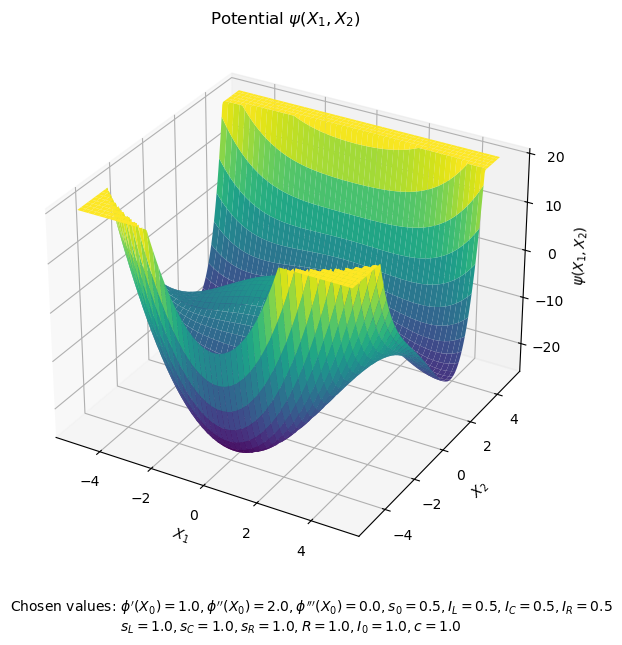

In [14]:

# Crear malla de valores para X1 y X2
x_vals = np.linspace(-5, 5, 200)
y_vals = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = potencial_num(X, Y)
low_threshold = -40.0
high_threshold = 20

# O usando percentiles para capturar la mayor parte de la variabilidad:
# low_threshold = np.percentile(Z, 5)
# high_threshold = np.percentile(Z, 95)

# Aplicar el recorte a Z
Z = np.clip(Z, low_threshold, high_threshold)
# Gráfica 3D del potencial
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Añadir leyenda (caption) con los valores elegidos
caption = (
    f"Chosen values: $\\phi'(X_0)={phi_p_val:.1f}, \\phi''(X_0)={phi_pp_val:.1f}, "
    f"\\phi'''(X_0)={phi_ppp_val:.1f}, s_0={s0_val:.1f}, I_L={IL_val:.1f}, I_C={IC_val:.1f}, "
    f"I_R={IR_val:.1f}, s_L={sL_val:.1f}, s_C={sC_val:.1f}, s_R={sR_val:.1f}, R={R_val:.1f}, I_0={I0_val:.1f}, c={c_val:.1f}$"
)
ax.text2D(-0.01, -0.05, 
          f"Chosen values: $\\phi'(X_0)={phi_p_val:.1f}, \\phi''(X_0)={phi_pp_val:.1f}, \\phi'''(X_0)={phi_ppp_val:.1f}, s_0={s0_val:.1f}, I_L={IL_val:.1f}, I_C={IC_val:.1f}, I_R={IR_val:.1f}$\n"
          f"                         $s_L={sL_val:.1f}, s_C={sC_val:.1f}, s_R={sR_val:.1f}, R={R_val:.1f}, I_0={I0_val:.1f}, c={c_val:.1f}$",
          transform=ax.transAxes, fontsize=10, verticalalignment='top')

# Etiquetas y título
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$\\psi(X_1,X_2)$')
ax.set_title('Potential $\\psi(X_1,X_2)$')

# Guardar la figura y mostrarla
plt.savefig('potencial.png', dpi=600)
plt.show()

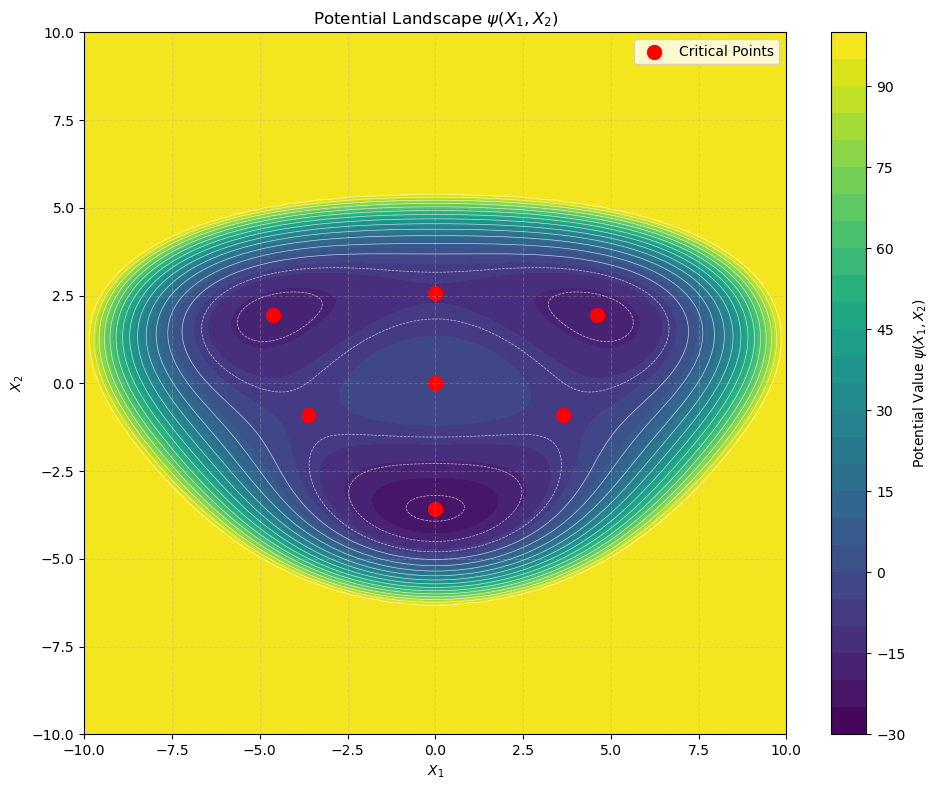

In [15]:
import numpy as np
from matplotlib.colors import SymLogNorm
import matplotlib.pyplot as plt

# Create a grid of values for X1 and X2
x_vals = np.linspace(-10, 10, 200)
y_vals = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x_vals, y_vals)

# Use the existing potential_num function from cell 12
Z = potencial_num(X, Y)

Z = np.clip(Z, -50, 100)  # Limitar el rango de Z para evitar problemas de visualización
# Create a contour plot with filled contours
norm = SymLogNorm(linthresh=1.0, vmin=Z.min(), vmax=Z.max())

fig, ax = plt.subplots(figsize=(10, 8))


# Create a filled contour plot with 30 levels
contour = ax.contourf(X, Y, Z, 30, cmap='viridis')
# Add contour lines for better visualization
ax.contour(X, Y, Z, 15, colors='white', linewidths=0.5, alpha=0.7)

# Mark the critical points
critical_points = [
    [0.0, -3.582207],
    [-3.637959, -0.894312],
    [-4.610155, 1.956812],
    [0.0, 0.0],
    [-0.0, 2.582207],
    [3.637959, -0.894312],
    [4.610155, 1.956812]
]

ax.scatter(*zip(*critical_points), color='red', s=100, marker='o', label='Critical Points')

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Potential Value $\\psi(X_1, X_2)$')

# Add labels and title
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_title('Potential Landscape $\\psi(X_1, X_2)$')
ax.legend()

# Show grid
ax.grid(linestyle='--', alpha=0.3)

# Set equal aspect ratio
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('potential_landscape.png', dpi=300)
plt.show()

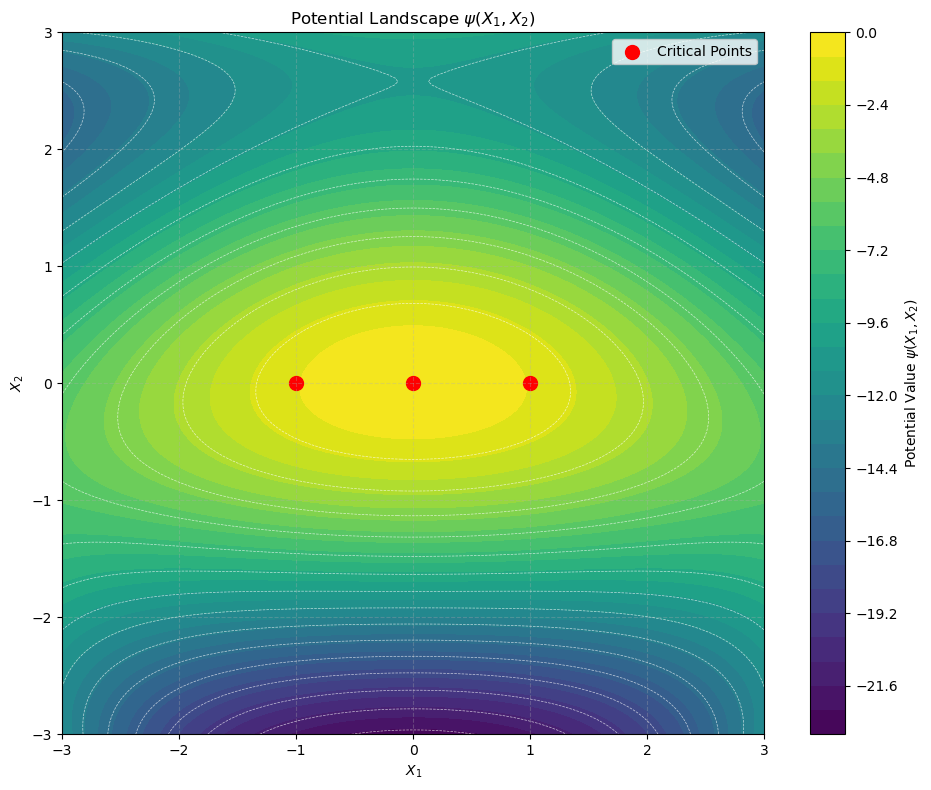

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Crear malla de valores para X1 y X2
x_vals = np.linspace(-3, 3, 200)
y_vals = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = potencial_num(X, Y)

# Definir thresholds (puedes ajustar estos valores)
# Ejemplo: usando valores fijos:
low_threshold = -40.0
high_threshold = 20

# O usando percentiles para capturar la mayor parte de la variabilidad:
# low_threshold = np.percentile(Z, 5)
# high_threshold = np.percentile(Z, 95)

# Aplicar el recorte a Z
Z_clipped = np.clip(Z, low_threshold, high_threshold)

# Crear un gráfico de contorno con los valores recortados
fig, ax = plt.subplots(figsize=(10, 8))

# Crear un contorno lleno con 30 niveles
contour = ax.contourf(X, Y, Z_clipped, 30, cmap='viridis')
# Añadir líneas de contorno para una mejor visualización
ax.contour(X, Y, Z_clipped, 15, colors='white', linewidths=0.5, alpha=0.7)

# Marcar los puntos críticos
critical_points = [(-1, 0), (0, 0), (1, 0)]
ax.scatter(*zip(*critical_points), color='red', s=100, marker='o', label='Critical Points')

# Añadir barra de color
cbar = plt.colorbar(contour)
cbar.set_label('Potential Value $\\psi(X_1, X_2)$')

# Añadir etiquetas y título
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_title('Potential Landscape $\\psi(X_1, X_2)$')
ax.legend()

# Mostrar grid
ax.grid(linestyle='--', alpha=0.3)

# Asegurar la proporción de aspecto
ax.set_aspect('equal')

plt.tight_layout()
plt.show()


In [17]:
from scipy.optimize import fsolve
import pandas as pd
# ------------------------------------------
# Cálculo del gradiente (derivadas parciales)
# ------------------------------------------
F1 = sp.diff(U_simpl, X1)  # dU/dX1
F2 = sp.diff(U_simpl, X2)  # dU/dX2

# Sustituir los parámetros en las derivadas
F1_num_expr = sp.N(F1.subs(subs_dict))
F2_num_expr = sp.N(F2.subs(subs_dict))

# Convertir el gradiente en una función numérica
grad_func = sp.lambdify((X1, X2), [F1_num_expr, F2_num_expr], 'numpy')

# ------------------------------------------
# Resolver numéricamente grad_U = 0 usando fsolve
# ------------------------------------------
def grad_wrapper(x):
    return np.array(grad_func(x[0], x[1])).astype(float)

# Elegimos varios puntos iniciales (se esperan tres wells)
x_guess = np.linspace(-5, 5, 10)
y_guess = np.linspace(-5, 5, 10)
initial_guesses = np.array(np.meshgrid(x_guess, y_guess)).T.reshape(-1, 2)

critical_points_fsolve = []
for guess in initial_guesses:
    sol = fsolve(grad_wrapper, guess)
    sol_rounded = np.round(sol, decimals=6)  # redondeamos para evitar duplicados
    if not any(np.allclose(sol_rounded, cp) for cp in critical_points_fsolve):
        critical_points_fsolve.append(sol_rounded)

print("Critical points found with fsolve:")
for cp in critical_points_fsolve:
    print(cp)
print("Done with fsolve.")


Hessian = sp.hessian(U_simpl, (X1, X2))

print("\nHessian and classification of critical points (using sympy.solve results):")
for cp in critical_points_fsolve:
# Sustituir el punto crítico y los parámetros en la Hessiana
    H_cp = Hessian.subs({X1: cp[0], X2: cp[1]}).subs(subs_dict)
    eigenvals = H_cp.eigenvals()
    U_val = U_simpl.subs({X1: cp[0], X2: cp[1]}).subs(subs_dict)
    print("Critical point:", cp)
    print("Potential value:", U_val)
    print("Eigenvalues of Hessian:")
    sp.pprint(eigenvals)
    # Se considera mínimo si todos los autovalores son positivos
    is_min = all(val > 0 for val in eigenvals.keys())
    print("Is minimum:", is_min)
    print("-"*40)
# Create a dataframe with critical points and their classification

# Lists to store the classifications
point_coords = []
potential_vals = []
eigenvalue1 = []
eigenvalue2 = []
point_types = []

# Process each critical point
for cp in critical_points_fsolve:
    # Calculate Hessian eigenvalues at this point
    H_cp = Hessian.subs({X1: cp[0], X2: cp[1]}).subs(subs_dict)
    eigenvals_dict = H_cp.eigenvals()
    eigenvals_list = list(eigenvals_dict.keys())
    
    # Store potential value
    U_val = float(U_simpl.subs({X1: cp[0], X2: cp[1]}).subs(subs_dict))
    
    # Classify the critical point based on eigenvalues
    if all(val > 0 for val in eigenvals_list):
        point_type = "Minimum"
    elif all(val < 0 for val in eigenvals_list):
        point_type = "Maximum"
    else:
        point_type = "Saddle Point"
    
    # Append to lists
    point_coords.append(f"({cp[0]:.4f}, {cp[1]:.4f})")
    potential_vals.append(U_val)
    eigenvalue1.append(float(eigenvals_list[0]))
    eigenvalue2.append(float(eigenvals_list[1]))
    point_types.append(point_type)

# Create dataframe
critical_points = pd.DataFrame({
    'Critical Point': point_coords,
    'Potential Value': potential_vals,
    'Eigenvalue 1': eigenvalue1,
    'Eigenvalue 2': eigenvalue2,
    'Type': point_types
})

display(critical_points)

# # ------------------------------------------
# # Resolver simbólicamente para comparar (opcional)
# # ------------------------------------------
# grad_U = [F1, F2]
# critical_points_sym = sp.solve(grad_U, (X1, X2), dict=True)
# print("\nCritical points found with sympy.solve:")
# sp.pprint(critical_points_sym)
# print()


# # ------------------------------------------
# # Cálculo de la matriz Hessiana y clasificación de los puntos críticos
# # ------------------------------------------
# Hessian = sp.hessian(U_simpl, (X1, X2))

# print("\nHessian and classification of critical points (using sympy.solve results):")
# for cp in critical_points_sym:
#     # Sustituir el punto crítico y los parámetros en la Hessiana
#     H_cp = Hessian.subs(cp).subs(subs_dict)
#     eigenvals = H_cp.eigenvals()
#     U_val = U_simpl.subs(cp).subs(subs_dict)
#     print("Critical point:", cp)
#     print("Potential value:", U_val)
#     print("Eigenvalues of Hessian:")
#     sp.pprint(eigenvals)
#     # Se considera mínimo si todos los autovalores son positivos
#     is_min = all(val > 0 for val in eigenvals.keys())
#     print("Is minimum:", is_min)
#     print("-"*40)


Critical points found with fsolve:
[ 0.       -3.582207]
[-3.637959 -0.894312]
[-4.610155  1.956812]
[0. 0.]
[-0.        2.582207]
[ 3.637959 -0.894312]
[4.610155 1.956812]
Done with fsolve.

Hessian and classification of critical points (using sympy.solve results):
Critical point: [ 0.       -3.582207]
Potential value: -25.1288353785256
Eigenvalues of Hessian:
{3.24915524771225: 1, 16.5616552294102: 1}
Is minimum: True
----------------------------------------
Critical point: [-3.637959 -0.894312]
Potential value: -6.48229894314498
Eigenvalues of Hessian:
{-4.85280147809934: 1, 3.88784720429984: 1}
Is minimum: False
----------------------------------------
Critical point: [-4.610155  1.956812]
Potential value: -18.0705575021673
Eigenvalues of Hessian:
{2.85443923876157: 1, 10.6144203316109: 1}
Is minimum: True
----------------------------------------
Critical point: [0. 0.]
Potential value: 0
Eigenvalues of Hessian:
{-6.9375: 1, -1.75: 1}
Is minimum: False
-----------------------------

,Critical Point,Potential Value,Eigenvalue 1,Eigenvalue 2,Type
0,"(0.0000, -3.5822)",-25.128835,3.249155,16.561655,Minimum
1,"(-3.6380, -0.8943)",-6.482299,3.887847,-4.852801,Saddle Point
2,"(-4.6102, 1.9568)",-18.070558,2.854439,10.614420,Minimum
3,"(0.0000, 0.0000)",0.000000,-1.750000,-6.937500,Maximum
4,"(-0.0000, 2.5822)",-10.488352,-1.374155,11.938345,Saddle Point
5,"(3.6380, -0.8943)",-6.482299,3.887847,-4.852801,Saddle Point
6,"(4.6102, 1.9568)",-18.070558,2.854439,10.614420,Minimum


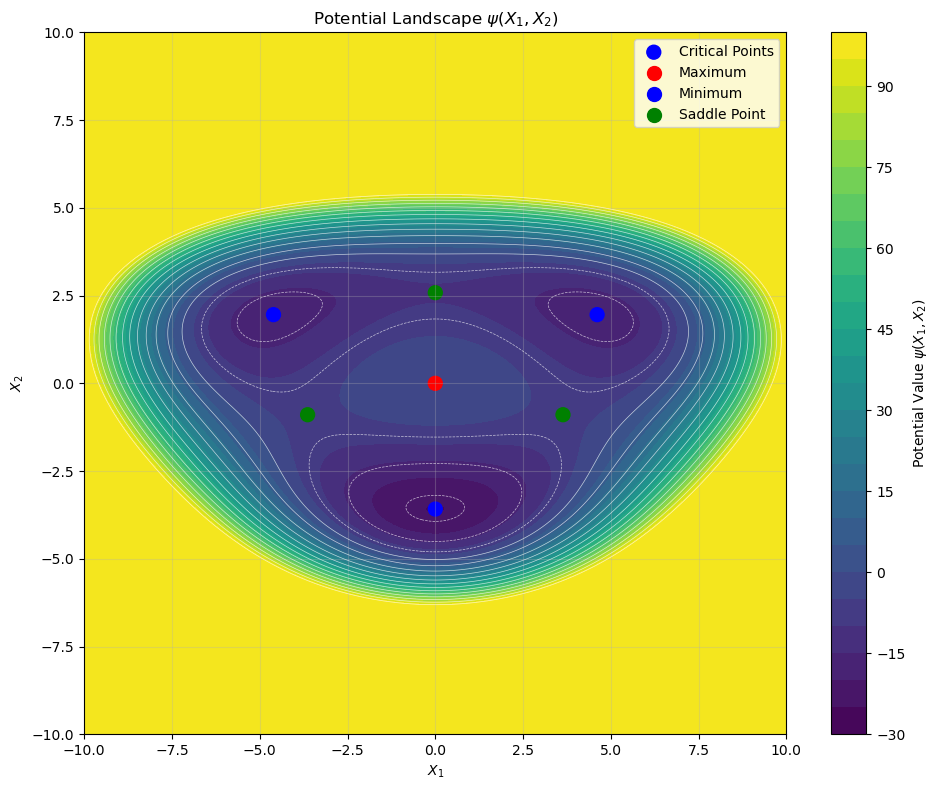

In [18]:
import numpy as np
from matplotlib.colors import SymLogNorm
import matplotlib.pyplot as plt

# Create a grid of values for X1 and X2
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Use the existing potential_num function from cell 12
Z = potencial_num(X, Y)

Z = np.clip(Z, -50, 100)  # Limitar el rango de Z para evitar problemas de visualización
# Create a contour plot with filled contours

fig, ax = plt.subplots(figsize=(10, 8))


# Create a filled contour plot with 30 levels
contour = ax.contourf(X, Y, Z, 30, cmap='viridis')
# Add contour lines for better visualization
ax.contour(X, Y, Z, 15, colors='white', linewidths=0.5, alpha=0.7)

# Mark the critical points
# Extract x and y coordinates and types from critical_points DataFrame
x_coords = []
y_coords = []
point_types = []

for i, row in critical_points.iterrows():
	# Extract coordinates from strings like "(0.0000, -3.5822)"
	coord_str = row['Critical Point']
	coords = coord_str.strip('()').split(',')
	x_coords.append(float(coords[0]))
	y_coords.append(float(coords[1]))
	point_types.append(row['Type'])

# Create a colormap for different types
colors = {'Maximum': 'red', 'Minimum': 'blue', 'Saddle Point': 'green'}
point_colors = [colors[t] for t in point_types]

# Plot the critical points
ax.scatter(x_coords, y_coords, c=point_colors, s=100, marker='o', label='Critical Points')

# Add a legend for point types
for point_type, color in colors.items():
	ax.scatter([], [], c=color, label=point_type, s=100, marker='o')

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Potential Value $\\psi(X_1, X_2)$')

# Add labels and title
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_title('Potential Landscape $\\psi(X_1, X_2)$')
ax.legend()

# Show grid
ax.grid(linestyle='-', alpha=0.3)

# Set equal aspect ratio
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('potential_landscape.png', dpi=600)
plt.show()

In [ ]:
import numpy as np
import sympy as sp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# ------------------------------------------
# Definición simbólica del potencial y parámetros
# ------------------------------------------
# Variables de estado
X1, X2 = sp.symbols('X1 X2', real=True)

# Potencial de ejemplo con tres wells en la dirección X1
U_simpl = X1**2 * (X1**2 - 1)**2 + X2**2

# Parámetros para la sustitución
s0_val = 1
IL_val, IC_val, IR_val = 1, 1, 1
sL_val, sC_val, sR_val = 1, 1, 1
R_val = 1
I0_val = 10       
c_val = 1        
g_val = 1  
R_I_val = 1

# ------------------------------------------
# Definir φ(x) a trozos y sus derivadas para la evaluación en X₀
# ------------------------------------------
# Variable para la función a trozos
x = sp.symbols('x', real=True)
phi = sp.Piecewise(
    (0, x < 0),
    (x**2, sp.And(x >= 0, x <= 1)),
    (2*sp.sqrt(x) - sp.Rational(3, 4), x > 1)
)
phi_prime = sp.diff(phi, x)
phi_double_prime = sp.diff(phi_prime, x)
phi_triple_prime = sp.diff(phi_double_prime, x)

# Parámetros simbólicos usados en la definición de X₀
s0, R, R_I, I0, c, g = sp.symbols('s0 R R_I I0 c g', real=True)
# Definición de X₀
X0 = s0*R - c*R_I + I0

# Evaluar las derivadas de φ en X₀ con los valores numéricos
phi_p_val = sp.N(phi_prime.subs(x, X0).subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val}))
phi_pp_val = sp.N(phi_double_prime.subs(x, X0).subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val}))
phi_ppp_val = sp.N(phi_triple_prime.subs(x, X0).subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val}))

# ------------------------------------------
# Construir el diccionario de sustitución
# ------------------------------------------
subs_dict = {
    sp.symbols('phi_p'): phi_p_val, 
    sp.symbols('phi_pp'): phi_pp_val,
    sp.symbols('phi_ppp'): phi_ppp_val,
    sp.symbols('phi_Ip'): phi_p_val,
    sp.symbols('s0'): s0_val,
    sp.symbols('I0'): I0_val,
    sp.symbols('c'): c_val,
    sp.symbols('g'): g_val,
    sp.symbols('R'): R_val,
    sp.symbols('I_L'): IL_val,
    sp.symbols('I_C'): IC_val,
    sp.symbols('I_R'): IR_val,
    sp.symbols('s_L'): sL_val,
    sp.symbols('s_C'): sC_val,
    sp.symbols('s_R'): sR_val,
}

# Sustituir en el potencial y forzar la evaluación numérica
pot_expr_num = sp.N(U_simpl.subs(subs_dict))
# (En tu caso, U_simpl es la expresión obtenida al integrar el campo)

# ------------------------------------------
# Cálculo del gradiente (derivadas parciales)
# ------------------------------------------
F1 = sp.diff(U_simpl, X1)  # dU/dX1
F2 = sp.diff(U_simpl, X2)  # dU/dX2

# Sustituir los parámetros en las derivadas
F1_num_expr = sp.N(F1.subs(subs_dict))
F2_num_expr = sp.N(F2.subs(subs_dict))

# Convertir el gradiente en una función numérica
grad_func = sp.lambdify((X1, X2), [F1_num_expr, F2_num_expr], 'numpy')

# ------------------------------------------
# Resolver numéricamente grad_U = 0 usando fsolve
# ------------------------------------------
def grad_wrapper(x):
    return np.array(grad_func(x[0], x[1])).astype(float)

# Elegimos varios puntos iniciales (se esperan tres wells)
initial_guesses = [(-2, 0), (0, -2), (1, 0)]
critical_points_fsolve = []
for x_guess in np.linspace(-2, 2, 5):
    for y_guess in np.linspace(-2, 2, 5):
        sol = fsolve(grad_wrapper, guess)
        sol_rounded = np.round(sol, decimals=6)  # redondeamos para evitar duplicados
        if not any(np.allclose(sol_rounded, cp) for cp in critical_points_fsolve):
            critical_points_fsolve.append(sol_rounded)

print("Critical points found with fsolve:")
for cp in critical_points_fsolve:
    print(cp)





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Se realizan múltiples intentos de solución a partir de distintos valores iniciales para asegurar encontrar todos los equilibrios
guesses = []
x_vals = np.linspace(-4, 4, 50)
y_vals = np.linspace(-4, 4, 50)
for x0 in x_vals:
    for y0 in y_vals:
        guesses.append([x0, y0])

solutions = []
for guess in guesses:
    sol = fsolve(grad_wrapper, guess, xtol=14e-14)
    # Solo se agrega la solución si no está ya incluida (dentro de tolerancia)
    if not any(np.allclose(sol, s, atol=1e-2) for s in solutions):
        solutions.append(sol)

solutions = np.array(solutions)
print('Puntos de equilibrio encontrados:')
# Construcción de la malla para dibujar las nullclines
x_grid = np.linspace(-0.5, 0.5, 400)
y_grid = np.linspace(-0.5, 0.5, 400)
X, Y = np.meshgrid(x_grid, y_grid)

F_vals = grad_func(X, Y)[0]
G_vals = grad_func(X, Y)[1]

# Dibujo de las nullclines y los puntos de equilibrio (intersecciones)
plt.figure(figsize=(8,6))
plt.plot(solutions[:,0], solutions[:,1], 'ko', markersize=8, label='Equilibrios')
nc1 = plt.contour(X, Y*2, F_vals, levels=[0], colors='red', linewidths=2)
nc2 = plt.contour(X, Y*2, G_vals, levels=[0], colors='blue', linewidths=2)
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-0.5, 0.5)
plt.title('Nullclines e intersecciones (equilibrios) para I₁ = {}'.format(I1))
plt.legend()
plt.grid(True)
plt.show()

print(f'Distancia de los puntos de equilibrio al centro: {np.linalg.norm(solutions[0])}, {np.linalg.norm(solutions[1])}, {np.linalg.norm(solutions[2])}, {np.linalg.norm(solutions[3])}')


In [ ]:
plot_simulations(10)